<h1><b> DSC 170: Geoprocessing. Putting things together</b></h1>

This lecture will cover two use cases related to vector data operations, geoenrichment, and prediction, and will introduce geoprocessing tools.

* Geoprocessing
* Asthma prediction with SkLearn (Asthma_Prediction_sklearn.ipynb)
* Designating bike routes (designate_bike_routes_for_commuting_professionals.ipynb) 

## Geoprocessing
A geoprocessing tool is a function that performs an operation on GIS data.  A typical geoprocessing operation takes an input dataset, performs an operation on that dataset, and returns the result of the operation as an output dataset. Common geoprocessing operations include geographic feature overlay, feature selection and analysis, topology processing, raster processing, and data conversion. 

Geoprocessing tools are represented as functions in the API, and are located within the module representing the type of spatial data they apply to. Developers simply import the modules in their programs, and use the types and functions defined therein to perform geoprocessing.

Common modules that include geoprocessing tools:

* The `arcgis.features` module is used for working with feature data, feature layers and collections of feature layers in the GIS. It also contains the spatial analysis geoprocessing tools which operate on feature data.

* The `arcgis.raster` module containing classes and raster analysis geoprocessing tools for working with raster data and imagery layers.

* The `arcgis.network` module contains classes and functions for network analysis such as finding the closest facility, the best route for a vehicle, the best routes for a fleet of vehicles, locating facilities using location allocation, calculating an OD cost matrix, and generating service areas.  

* The `arcgis.geoanalytics` module provides types and geoprocessing tools for distributed analysis of large datasets.

Geoprocessing tools can be shared with other users on AGOL. Users package their tools into toolboxes. You can search for geoprocessing toolboxes just like you search for any other item.


In [1]:
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

import arcgis
from arcgis.gis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.geoprocessing import import_toolbox
from IPython.display import display

# login with UCSD Single-Sign-On. 
gis=GIS("https://ucsdonline.maps.arcgis.com/home", client_id="bZshlNXFuaR2KHff") 

arcgis.__version__

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://ucsdonline.maps.arcgis.com/sharing/rest/oauth2/authorize?response_type=code&client_id=bZshlNXFuaR2KHff&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=mjpjHYdm52jc7midhKl69I526vA3Mw&allow_verification=false


'2.4.0'

## San Diego toolboxes

Browse https://gis-public.sandiegocounty.gov/arcgis/rest/

Notice different types of servers, and also Tools (https://gis-public.sandiegocounty.gov/arcgis/rest/services/Tools)



## Viewsheds

In [2]:
# Let's find some toolboxes (eg related to viewsheds)
toolboxes = gis.content.search('viewshed', 'Geoprocessing Toolbox', 
                               outside_org=True, max_items=10)

<Item title:"Viewshed" type:Geoprocessing Toolbox owner:esri>
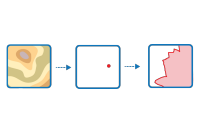

<Item title:"viewshed" type:Geoprocessing Toolbox owner:tsapic>

<Item title:"Elevation" type:Geoprocessing Toolbox owner:carlos.garcia.dev>

<Item title:"viewshed" type:Geoprocessing Toolbox owner:malu.yazi>

<Item title:"ViewshedArtilleryToolUpdated" type:Geoprocessing Toolbox owner:jrquist_NCSU>
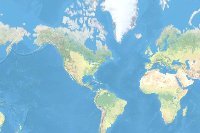

<Item title:"ESRI_Elevation_World" type:Geoprocessing Toolbox owner:ArcGISTeamAnalysis>

<Item title:"Viewshed" type:Geoprocessing Toolbox owner:venkyesri>
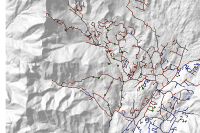

<Item title:"Model3" type:Geoprocessing Toolbox owner:jeffallenby>
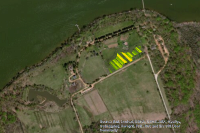

<Item title:"viewshed" type:Geoprocessing Toolbox owner:tsapic>
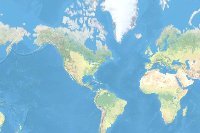

<Item title:"Viewshed2" type:Geoprocessing Toolbox owner:shinglin>
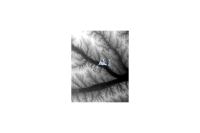

In [3]:
for toolbox in toolboxes:
    display(toolbox)

In ArcGIS API for Python, geoprocessing toolboxes are represented as Python modules and the individual tools as Python functions. Let's see what functions are exposed in a toolbox.

In [4]:
# first, we'll import a toolbox as a module:
viewshed_toolbox = toolboxes[0]
viewshed = import_toolbox(viewshed_toolbox)

# This viewshed service can be also imported via a URL, eg 

# url = 'https://elevation.arcgis.com/arcgis/rest/services/Tools/Elevation/GPServer/Viewshed'
# vshed_from_url = import_toolbox(url)

# It requires authentication to ArcGIS Online

# url_sample = 'http://sampleserver1.arcgisonline.com/ArcGIS/rest/services/Elevation/ESRI_Elevation_World/GPServer'
# viewshed = import_toolbox(url_sample)


In [5]:
# The import_toolbox() function inspects the geoprocessing toolbox
# and dynamically generates a Python module containing a 
# function for each tool within the toolbox.

# Let's inspect the imported toolbox:

import inspect

# list the public functions in the imported module
[ f[0] for f in inspect.getmembers(viewshed, inspect.isfunction) 
             if not f[0].startswith('_')]


['profile', 'summarize_elevation', 'viewshed']

In [6]:
# Explore it further:

help(viewshed.viewshed)

Help on function viewshed:

viewshed(input_points: 'FeatureSet' = {'displayFieldName': '', 'geometryType': 'esriGeometryPoint', 'spatialReference': {'wkid': 102100, 'latestWkid': 3857}, 'fields': [{'name': 'OID', 'type': 'esriFieldTypeOID', 'alias': 'OID'}, {'name': 'field1', 'type': 'esriFieldTypeSmallInteger', 'alias': 'field1'}], 'features': [], 'exceededTransferLimit': False}, maximum_distance: 'float' = None, maximum_distance_units: 'str' = 'Meters', dem_resolution: 'str' = None, observer_height: 'float' = 1.75, observer_height_units: 'str' = 'Meters', surface_offset: 'float' = 0, surface_offset_units: 'str' = 'Meters', generalize_viewshed_polygons: 'bool' = True, gis=None, future=False, estimate=False) -> 'FeatureSet'
            
    Returns polygons of visible areas for a given set of input observation points.
    
    Parameters:
    
       input_points: Input Point Features (FeatureSet). Required parameter.  The point features to use as the observer locations.
    
       ma

Let's run it. 

In [7]:
arcgis.env.out_spatial_reference = 4326

In [8]:
map = gis.map('San Diego')
map

Map(center=[3857636.3466711883, -13042616.481232138], extent={'xmin': -13075789.689488532, 'ymin': 3818273.910…

In [9]:
# Let's formulate a request to compute viewshed using the imported viewshed tool

from arcgis.features import Feature, FeatureSet

# Create a point feature with proper spatial reference
point_feature = Feature(
    geometry={
        'x': -117.0,
        'y': 32.7,
        'spatialReference': {'wkid': 4326}
    }
)

# Create a FeatureSet with the point
input_points = FeatureSet([point_feature], geometry_type='esriGeometryPoint')

# Call viewshed with parameters
result = viewshed.viewshed(
    input_points=input_points,
    maximum_distance=10,
    maximum_distance_units='Miles',
    dem_resolution='FINEST',  # Using finest available resolution
    observer_height=1.75,     # Default height of a person
    observer_height_units='Meters',
    surface_offset=0,         # Default surface offset
    surface_offset_units='Meters',
    generalize_viewshed_polygons=True
)


In [10]:
# Add the computed visible areas to the map
map.content.draw(result)

## We can also do this using the tool's query interface

In [11]:
# Let's use the following inputs at 
# https://elevation.arcgis.com/arcgis/rest/services/Tools/Elevation/GPServer/Viewshed
# then "Submit Job"


# The point collection
{
 "displayFieldName": "",
 "geometryType": "esriGeometryPoint",
 "spatialReference": {
  "wkid": 102100,
  "latestWkid": 3857
 },
 "fields": [
  {
   "name": "OID",
   "type": "esriFieldTypeOID",
   "alias": "OID"
  },
  {
   "name": "Name",
   "type": "esriFieldTypeString",
   "alias": "Name"
  }
 ],
 "features": [ {
            "geometry" : {"x" : -117.0, "y" : 32.7, "spatialReference" : {"wkid" : 4326}}, 
            "attributes" : {"OID" : 42,"Name" : "Feature 1"}}
],
 "exceededTransferLimit": False
}


{'displayFieldName': '',
 'geometryType': 'esriGeometryPoint',
 'spatialReference': {'wkid': 102100, 'latestWkid': 3857},
 'fields': [{'name': 'OID', 'type': 'esriFieldTypeOID', 'alias': 'OID'},
  {'name': 'Name', 'type': 'esriFieldTypeString', 'alias': 'Name'}],
 'features': [{'geometry': {'x': -117.0,
    'y': 32.7,
    'spatialReference': {'wkid': 4326}},
   'attributes': {'OID': 42, 'Name': 'Feature 1'}}],
 'exceededTransferLimit': False}

In [12]:
result = '''
{
 "paramName": "OutputViewshed",
 "dataType": "GPFeatureRecordSetLayer",
 "value": {
  "displayFieldName": "",
  "geometryType": "esriGeometryPolygon",
  "spatialReference": {
   "wkid": 4326,
   "latestWkid": 4326
  },
  "fields": [
   {
    "name": "OBJECTID",
    "type": "esriFieldTypeOID",
    "alias": "OBJECTID"
   },
   {
    "name": "Frequency",
    "type": "esriFieldTypeInteger",
    "alias": "Frequency"
   },
   {
    "name": "DEMResolution",
    "type": "esriFieldTypeString",
    "alias": "DEM Resolution",
    "length": 50
   },
   {
    "name": "ProductName",
    "type": "esriFieldTypeString",
    "alias": "Product Name",
    "length": 50
   },
   {
    "name": "Source",
    "type": "esriFieldTypeString",
    "alias": "Source",
    "length": 50
   },
   {
    "name": "Source_URL",
    "type": "esriFieldTypeString",
    "alias": "Source URL",
    "length": 84
   },
   {
    "name": "PerimeterKm",
    "type": "esriFieldTypeDouble",
    "alias": "Perimeter Kilometers"
   },
   {
    "name": "AreaSqKm",
    "type": "esriFieldTypeDouble",
    "alias": "Area Square Kilometers"
   },
   {
    "name": "Shape_Length",
    "type": "esriFieldTypeDouble",
    "alias": "Shape_Length"
   },
   {
    "name": "Shape_Area",
    "type": "esriFieldTypeDouble",
    "alias": "Shape_Area"
   }
  ],
  "features": [
   {
    "attributes": {
     "OBJECTID": 1,
     "Frequency": 1,
     "DEMResolution": "90m",
     "ProductName": "SRTM",
     "Source": "USGS, NASA, CGIAR",
     "Source_URL": "http://www.cgiar-csi.org/",
     "PerimeterKm": 31.8350946595381,
     "AreaSqKm": 78.760600804750098,
     "Shape_Length": 0.31349490834741289,
     "Shape_Area": 0.007557432332182785
    },
    "geometry": {
     "rings": [
      [
       [
        -117.24489200099998,
        32.454193634000035
       ],
       [
        -117.25532455299998,
        32.454531823000025
       ],
       [
        -117.25612611599996,
        32.455261805000077
       ],
       [
        -117.26385734999997,
        32.456507300000055
       ],
       [
        -117.26892089399996,
        32.457860007000079
       ],
       [
        -117.27689874499998,
        32.461036869000054
       ],
       [
        -117.28748673299998,
        32.467589292000071
       ],
       [
        -117.29456283899998,
        32.475190867000038
       ],
       [
        -117.29898288699997,
        32.482237477000069
       ],
       [
        -117.30032455299994,
        32.485466482000049
       ],
       [
        -117.30190025499996,
        32.489664560000051
       ],
       [
        -117.30362611599998,
        32.491013369000029
       ],
       [
        -117.30282455299999,
        32.50939005400005
       ],
       [
        -117.30195944899998,
        32.510066012000038
       ],
       [
        -117.29900849699999,
        32.517925799000068
       ],
       [
        -117.29331301499997,
        32.526456969000037
       ],
       [
        -117.28379846899998,
        32.535114610000051
       ],
       [
        -117.27306566099998,
        32.540654731000075
       ],
       [
        -117.26279784999997,
        32.543688527000029
       ],
       [
        -117.25779278299996,
        32.544494045000079
       ],
       [
        -117.25624853299996,
        32.545898991000058
       ],
       [
        -117.24279277999995,
        32.545223303000057
       ],
       [
        -117.24199122299996,
        32.544494045000079
       ],
       [
        -117.23249611699998,
        32.542587455000046
       ],
       [
        -117.22136563199996,
        32.538159165000025
       ],
       [
        -117.21224781199999,
        32.532114360000037
       ],
       [
        -117.20697937799997,
        32.526656350000053
       ],
       [
        -117.20146743999999,
        32.519065968000064
       ],
       [
        -117.19782455599994,
        32.509363262000079
       ],
       [
        -117.19615788299996,
        32.508060982000075
       ],
       [
        -117.19695945299998,
        32.491792718000056
       ],
       [
        -117.19782455599994,
        32.491116627000054
       ],
       [
        -117.19933236599996,
        32.485777214000052
       ],
       [
        -117.20527904099998,
        32.475147786000036
       ],
       [
        -117.21275835799997,
        32.467469121000079
       ],
       [
        -117.22131450199998,
        32.461933292000026
       ],
       [
        -117.22784207899997,
        32.45901888700007
       ],
       [
        -117.23725856999999,
        32.45623400900007
       ],
       [
        -117.24449122199997,
        32.455261805000077
       ],
       [
        -117.24489200099998,
        32.454193634000035
       ]
      ]
     ]
    }
   }
  ],
  "exceededTransferLimit": false
 }
}
'''

In a GIS, the ground, or terrain, is commonly represented with a digital elevation model (DEM). The toolbox uses a number of elevation datasets.

Consider a new [Shademap application](https://shademap.app/), which is built on similar ideas. For example, for UCSD see https://shademap.app/#32.88266,-117.23851,16.20634z,1641512971979t,0b,45p 

There are several additional geoprocessing server applications you can explore at http://sampleserver1.arcgisonline.com/ArcGIS/rest/services

## Let's consider several real applications

- [Modeling asthma rates](ArcGIS4_Asthma_Prediction_sklearn_v2.ipynb)
- [General analysis patterns: layer manipulations](../L09.%20ArcGIS5/ArcGIS5_ApplicationExample_Advanced_Layer_Operations_bike_routes_Seattle.ipynb)